In [1]:
import resources
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline

2023-04-13 15:58:39.649074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 15:58:39.756205: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-13 15:58:40.252612: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/tomje/miniconda3/pkgs/cudatoolkit-11.8.0-h37601d7_11/lib/libcudart.so.11.0:/home

In [2]:
exp5 = resources.load('Test 5')
exp7 = resources.load('Test 7')
exp8 = resources.load('Test 8')
exp9 = resources.load('Test 9')
exps = [exp5, exp7, exp8, exp9] 

In [3]:
data_names = ['mean_radius', 'peak_radius', 'runout', 'form_error']

m_rad = [exp.nc4.mean_radius for exp in exps]
p_rad = [exp.nc4.peak_radius for exp in exps]
runout = [exp.nc4.runout * 1000 for exp in exps]
form_error = [exp.nc4.form_error * 1000 for exp in exps]

data = [m_rad, p_rad, runout, form_error]

/tmp/ipykernel_14521/445292170.py:53: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


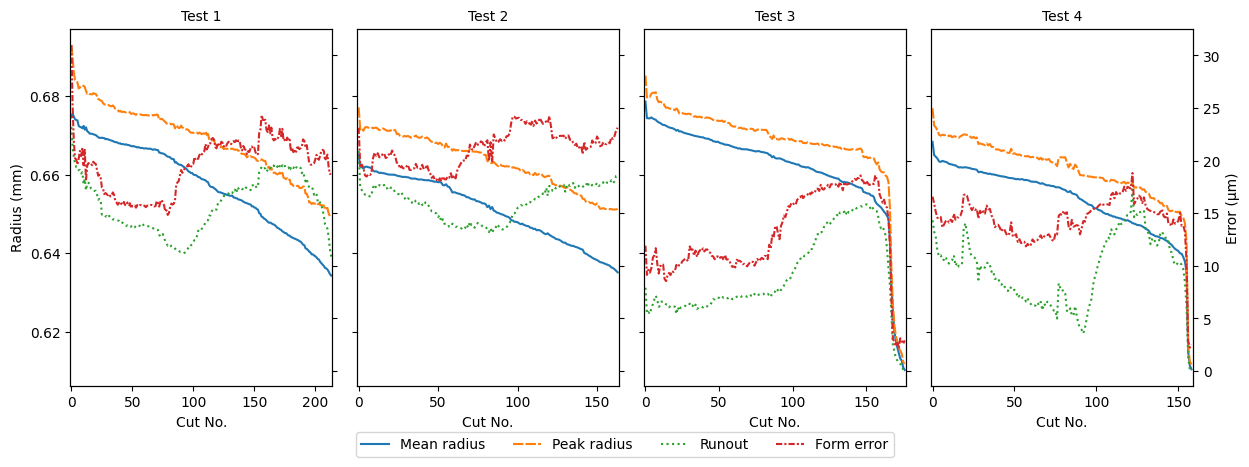

In [4]:
fig, ax = plt.subplots(1, 4, figsize=(12.6, 4.5), sharey=True) #, dpi=300)
axis_r = []
axis_e = []

for a in ax:
    axis_r.append(a)
    axis_e.append(a.twinx())

for ax1, ax2 in zip(axis_e[1:], axis_e[0:-1]):
    ax1.sharey(ax2)

ax = zip(axis_r, axis_e)

for i, (exp, (ax_r, ax_e)) in enumerate(zip(exps, ax)):
    lstyle = itertools.cycle(['-', (0, (5, 1)), ':', (0, (3, 1, 1, 1,))])
    lcolor = itertools.cycle(['C0', 'C1', 'C2', 'C3'])
    for data in data_names[:2]:
        lab = data.replace('_', ' ').capitalize()
        ax_r.plot(getattr(exp.nc4, data), 
                  linestyle=next(lstyle), 
                  color=next(lcolor), 
                  label=lab
                  )
    for data in data_names[2:]:
        lab = data.replace('_', ' ').capitalize()
        ax_e.plot(getattr(exp.nc4, data) * 1000, 
                  linestyle=next(lstyle), 
                  color=next(lcolor), 
                  label=lab
                  )

    ax_r.set_title(f'Test {i+1}', fontsize=10)
    ax_r.set_xlim(-1, len(getattr(exp.nc4, data)))
    ax_r.set_xlabel('Cut No.')
    l1, lab1 = ax_r.get_legend_handles_labels()
    l2, lab2 = ax_e.get_legend_handles_labels()

axis_r[0].set_ylabel('Radius (mm)')
axis_e[-1].set_ylabel('Error (\u03BCm)')

for a in axis_e[:-1]:
    plt.setp(a.get_yticklabels(), visible=False)

plt.figlegend(l1 + l2,
              lab1 + lab2, 
              loc='center', 
              bbox_to_anchor=(0.5, 0), 
              bbox_transform=fig.transFigure, 
              fontsize=10, 
              ncol=4
              )
fig.tight_layout()
fig.show()

/home/tomje/python/Acoustic-Emission/resources/nc4.py:289: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


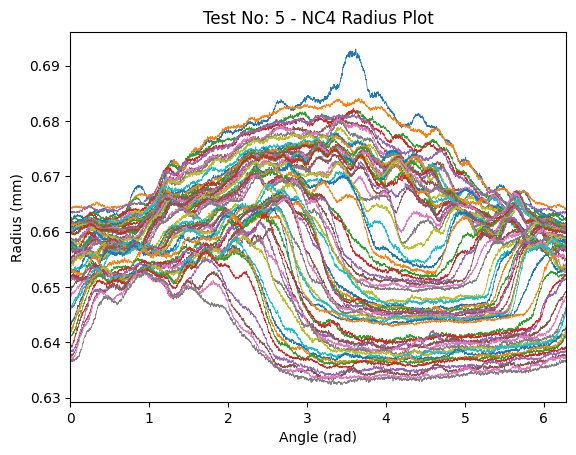

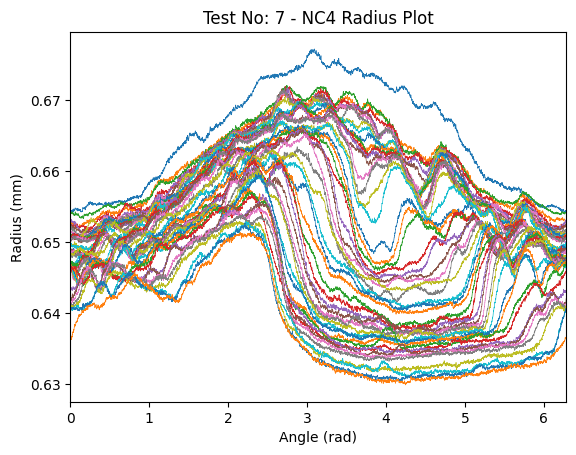

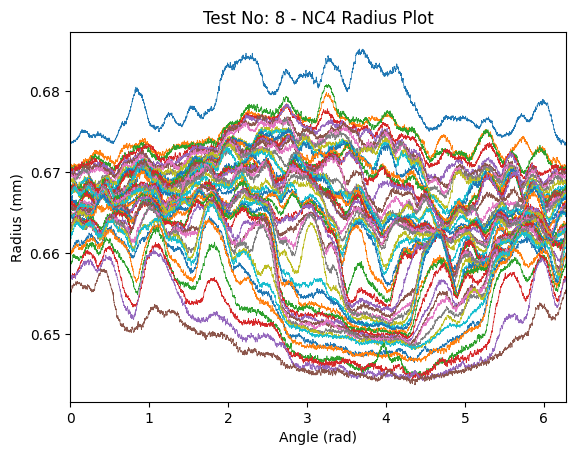

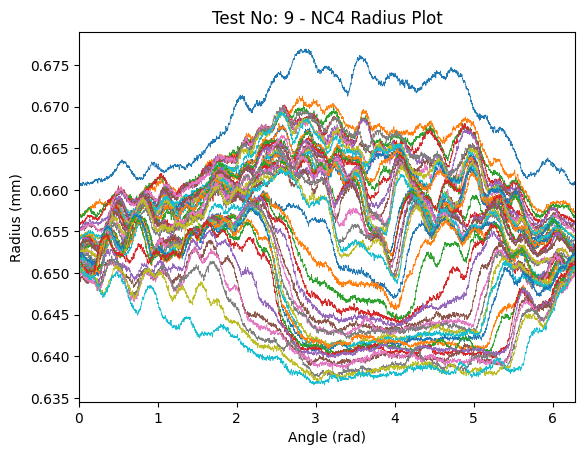

In [5]:
for exp in exps:
    exp.nc4.plot_xy((0,-10), 3)